In [1]:
#Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from scipy import stats
import hvplot.pandas
import requests


#import api key

from api_keys import geoapify_key

In [2]:
# Store filepath in a variable
OPTN_data = Path("Resources/cleaned_OPTN_data.csv")
state_data = Path("Resources/state_totals.csv")

# read the file - AP
kidney_data = pd.read_csv(OPTN_data)
state_totals = pd.read_csv(state_data)

kidney_data.head()


,State,Total,< 30 days,30 to < 90 days,90 days to < 6 months,6 months to < 1 year,1 year to < 2 years,2 years to < 3 years,3 years to < 5 years,> 5 years,Payment type,Blood type,Age,Ethnicity,Sex
0,Alabama,455,9,22,61,101,146,73,54,40,NaN,NaN,NaN,NaN,Female
1,Alabama,713,16,38,87,150,237,135,95,43,NaN,NaN,NaN,NaN,Male
2,Alabama,787,5,7,72,169,267,146,97,48,Public insurance - Medicare FFS (Fee for Service),NaN,NaN,NaN,NaN
3,Alabama,688,9,32,88,154,215,122,93,57,NaN,NaN,NaN,Black/Non-Hispanic,NaN
4,Alabama,631,14,30,80,136,209,124,81,46,NaN,O,NaN,NaN,NaN


In [3]:
#Define a function to replace commas and double quotes
def clean_value(value):
    if isinstance(value, str):
        # Remove commas and double quotes
        return value.replace(",", "").replace('"', '')
    return value

#Apply the function to each column
for column in kidney_data.columns:
    kidney_data[column] = kidney_data[column].apply(clean_value)

#Print the first five rows
print(kidney_data.head())

     State Total  < 30 days  30 to < 90 days  90 days to < 6 months  \
0  Alabama   455          9               22                     61   
1  Alabama   713         16               38                     87   
2  Alabama   787          5                7                     72   
3  Alabama   688          9               32                     88   
4  Alabama   631         14               30                     80   

  6 months to < 1 year 1 year to < 2 years 2 years to < 3 years  \
0                  101                 146                   73   
1                  150                 237                  135   
2                  169                 267                  146   
3                  154                 215                  122   
4                  136                 209                  124   

  3 years to < 5 years > 5 years  \
0                   54        40   
1                   95        43   
2                   97        48   
3                   93    

In [4]:
# need to type total and wait time columns as integers
kidney_data["Total"] = kidney_data["Total"].astype(int)
kidney_data["< 30 days"] = kidney_data["< 30 days"].astype(int)
kidney_data["30 to < 90 days"] = kidney_data["30 to < 90 days"].astype(int)
kidney_data["90 days to < 6 months"] = kidney_data["90 days to < 6 months"].astype(int)
kidney_data["6 months to < 1 year"] = kidney_data["6 months to < 1 year"].astype(int)
kidney_data["1 year to < 2 years"] = kidney_data["1 year to < 2 years"].astype(int)
kidney_data["2 years to < 3 years"] = kidney_data["2 years to < 3 years"].astype(int)
kidney_data["3 years to < 5 years"] = kidney_data["3 years to < 5 years"].astype(int)
kidney_data["> 5 years"] = kidney_data["> 5 years"].astype(int)

In [5]:
# Create a mapping for wait times to numerical values
wait_time_mapping = {
    "< 30 days": 15,
    "30 to < 90 days": 60,
    "90 days to < 6 months": 120,
    "6 months to < 1 year": 180,
    "1 year to < 2 years": 365,
    "2 years to < 3 years": 730,
    "3 years to < 5 years": 1460,
    "> 5 years": 2000
}

# Oklahoma

In [6]:
# Total candidates for Oklahoma

ok_totals1 = kidney_data.loc[kidney_data["State"] == "Oklahoma"]
ok_male_totals = ok_totals1.loc[ok_totals1["Sex"] == "Male"]["Total"].values[0]
ok_female_totals = ok_totals1.loc[ok_totals1["Sex"] == "Female"]["Total"].values[0]
ok_totals = ok_male_totals + ok_female_totals
ok_totals

597

## Wait time by blood type in Oklahoma

In [7]:
# Total for each blood type

ok_blood_type_O = ok_totals1.loc[ok_totals1["Blood type"] == "O"]["Total"].values[0]
ok_blood_type_A = ok_totals1.loc[ok_totals1["Blood type"] == "A"]["Total"].values[0]
ok_blood_type_B = ok_totals1.loc[ok_totals1["Blood type"] == "B"]["Total"].values[0]
ok_blood_type_AB = ok_totals1.loc[ok_totals1["Blood type"] == "AB"]["Total"].values[0]
print(ok_blood_type_O)
print(ok_blood_type_A)
print(ok_blood_type_B)
print(ok_blood_type_AB)

341
188
65
3


In [8]:
# OK blood type totals dataframe

ok_blood_type_totals = pd.DataFrame({"Blood type":["O", "A", "B", 
                                        "AB"], "Candidates":[ok_blood_type_O, ok_blood_type_A, ok_blood_type_B, 
                                                             ok_blood_type_AB]})
ok_blood_type_totals

,Blood type,Candidates
0,O,341
1,A,188
2,B,65
3,AB,3


In [9]:
# Hypothesis testing

# Assuming even distribution of people amongst blood types - mean of 149
# Degree of freedom is 4-1 = 3
# p-value = 0.05
# Reset index to blood type

ok_blood_type_totals["Expected"] = 149.25

ok_blood_type_totals.set_index("Blood type")

critical_value = stats.chi2.ppf(q = 0.95, df = 3)
print(critical_value)


7.814727903251179


In [10]:
# Null hypothesis is that number of candidates is evenly distributed amongst blood types

stats.chisquare(ok_blood_type_totals['Candidates'], ok_blood_type_totals['Expected'])

Power_divergenceResult(statistic=447.2814070351759, pvalue=1.2655367084022157e-96)

In [11]:
# Creating blood type vs wait time dataframe

ok_blood_type_wait = pd.DataFrame(ok_totals1[["Blood type","< 30 days", "30 to < 90 days", "90 days to < 6 months", 
                                        "6 months to < 1 year", "1 year to < 2 years","2 years to < 3 years", 
                                        "3 years to < 5 years", "> 5 years"]]).dropna()
ok_blood_type_wait

,Blood type,< 30 days,30 to < 90 days,90 days to < 6 months,6 months to < 1 year,1 year to < 2 years,2 years to < 3 years,3 years to < 5 years,> 5 years
1030,O,16,24,39,64,82,70,48,15
1034,A,14,15,21,46,47,25,15,7
1041,B,3,9,7,13,13,8,9,5
1051,AB,0,0,1,0,1,1,0,0


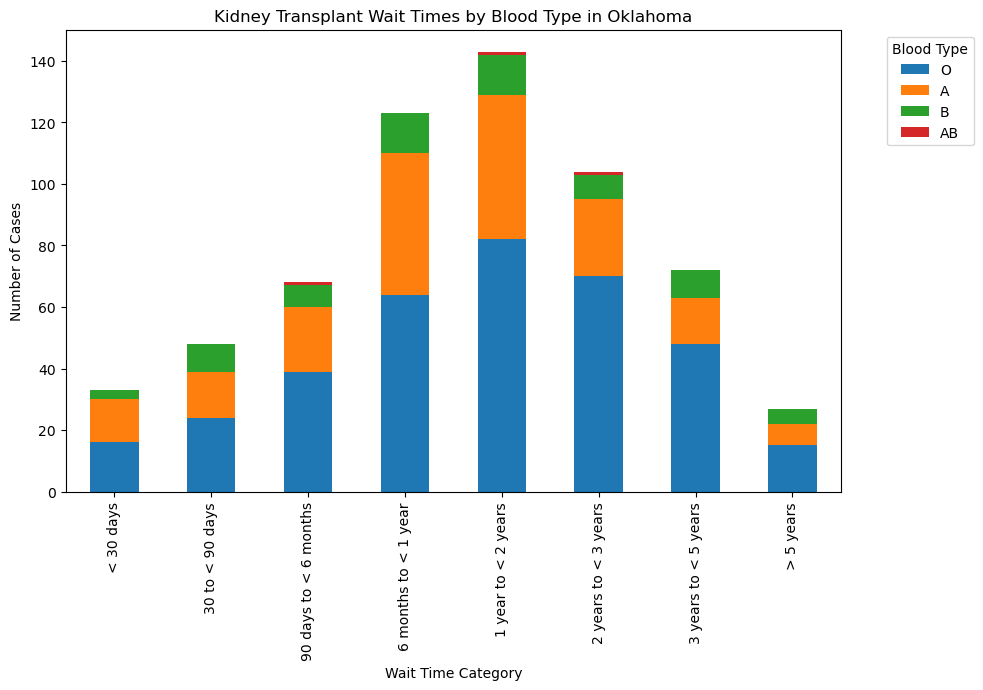

In [12]:
# Plot above on bar chart

# Set Blood type as the index
ok_blood_data = ok_blood_type_wait.set_index("Blood type")

# Transpose the DataFrame for easier plotting: https://www.w3resource.com/pandas/dataframe/dataframe-transpose.php
ok_blood_data = ok_blood_data.transpose()

# Plot the bar chart
ok_blood_data.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.title("Kidney Transplant Wait Times by Blood Type in Oklahoma")
plt.xlabel("Wait Time Category")
plt.ylabel("Number of Cases")
plt.legend(title="Blood Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

In [13]:
# Dataframes for each blood type with wait times

# Used the following code to identify the number values assigned to each wait time for each blood type:
#ok_blood_type_O_df = ok_blood_type_wait.loc[ok_blood_type_wait["Blood type"] == "O"].transpose().reset_index()
#ok_blood_type_O_df


ok_blood_type_O_df = pd.DataFrame({"Wait time":["< 30 days", "30 to < 90 days", "90 days to < 6 months", 
                                        "6 months to < 1 year", "1 year to < 2 years","2 years to < 3 years", 
                                        "3 years to < 5 years", "> 5 years"], "Candidates":[16, 24, 39, 64, 82, 70, 48, 15]})
print(ok_blood_type_O_df)
print("")

ok_blood_type_A_df = pd.DataFrame({"Wait time":["< 30 days", "30 to < 90 days", "90 days to < 6 months", 
                                        "6 months to < 1 year", "1 year to < 2 years","2 years to < 3 years", 
                                        "3 years to < 5 years", "> 5 years"], "Candidates":[14, 15, 21, 46, 47, 25, 15, 7]})
print(ok_blood_type_A_df)
print("")

ok_blood_type_B_df = pd.DataFrame({"Wait time":["< 30 days", "30 to < 90 days", "90 days to < 6 months", 
                                        "6 months to < 1 year", "1 year to < 2 years","2 years to < 3 years", 
                                        "3 years to < 5 years", "> 5 years"], "Candidates":[3, 9, 7, 13, 13, 8, 9, 5]})
print(ok_blood_type_B_df)
print("")

ok_blood_type_AB_df = pd.DataFrame({"Wait time":["< 30 days", "30 to < 90 days", "90 days to < 6 months", 
                                        "6 months to < 1 year", "1 year to < 2 years","2 years to < 3 years", 
                                        "3 years to < 5 years", "> 5 years"], "Candidates":[0, 0, 1, 0, 1, 1, 0, 0]})

print(ok_blood_type_AB_df)
print("")

               Wait time  Candidates
0              < 30 days          16
1        30 to < 90 days          24
2  90 days to < 6 months          39
3   6 months to < 1 year          64
4    1 year to < 2 years          82
5   2 years to < 3 years          70
6   3 years to < 5 years          48
7              > 5 years          15

               Wait time  Candidates
0              < 30 days          14
1        30 to < 90 days          15
2  90 days to < 6 months          21
3   6 months to < 1 year          46
4    1 year to < 2 years          47
5   2 years to < 3 years          25
6   3 years to < 5 years          15
7              > 5 years           7

               Wait time  Candidates
0              < 30 days           3
1        30 to < 90 days           9
2  90 days to < 6 months           7
3   6 months to < 1 year          13
4    1 year to < 2 years          13
5   2 years to < 3 years           8
6   3 years to < 5 years           9
7              > 5 years           5

In [14]:
# Concatenate individual blood type DataFrames
combined_df = pd.concat([ok_blood_type_O_df, ok_blood_type_A_df, ok_blood_type_B_df, ok_blood_type_AB_df])

# Group by "Blood type" and calculate the median for each blood type
median_by_blood_type = combined_df.groupby("Wait time")["Candidates"].median().reset_index()

# Apply the wait time mapping to the "Wait time" column
combined_df["Wait time"] = combined_df["Wait time"].map(wait_time_mapping)

# Group by "Blood type" and calculate the median for each blood type
median_by_blood_type = combined_df.groupby("Wait time")["Candidates"].median().reset_index()

# Display the median values
print(median_by_blood_type)

   Wait time  Candidates
0         15         8.5
1         60        12.0
2        120        14.0
3        180        29.5
4        365        30.0
5        730        16.5
6       1460        12.0
7       2000         6.0


In [15]:
#Median weight times by bloodtype in Oklahoma per dataframe per bloodtype
def calculate_weighted_median(df):
    # Convert the "Wait time" column to numerical values using the wait_time_mapping
    df["Wait time"] = df["Wait time"].map(wait_time_mapping)

    # Calculate the weighted median
    weighted_median_wait_time = (df["Candidates"] * df["Wait time"]).sum() / df["Candidates"].sum()

    # Return the result
    return weighted_median_wait_time

#DataFrames for each blood type
median_bloodtypeO = pd.DataFrame({"Wait time": ["< 30 days", "30 to < 90 days", "90 days to < 6 months", 
                                                   "6 months to < 1 year", "1 year to < 2 years", 
                                                   "2 years to < 3 years", "3 years to < 5 years", "> 5 years"],
                                   "Candidates": [16, 24, 39, 64, 82, 70, 48, 15]})

median_bloodtypeA = pd.DataFrame({"Wait time": ["< 30 days", "30 to < 90 days", "90 days to < 6 months", 
                                                   "6 months to < 1 year", "1 year to < 2 years", 
                                                   "2 years to < 3 years", "3 years to < 5 years", "> 5 years"],
                                   "Candidates": [14, 15, 21, 46, 47, 25, 15, 7]})

median_bloodtypeB = pd.DataFrame({"Wait time": ["< 30 days", "30 to < 90 days", "90 days to < 6 months", 
                                                   "6 months to < 1 year", "1 year to < 2 years", 
                                                   "2 years to < 3 years", "3 years to < 5 years", "> 5 years"],
                                   "Candidates": [3, 9, 7, 13, 13, 8, 9, 5]})

median_bloodtypeAB = pd.DataFrame({"Wait time": ["< 30 days", "30 to < 90 days", "90 days to < 6 months", 
                                                    "6 months to < 1 year", "1 year to < 2 years", 
                                                    "2 years to < 3 years", "3 years to < 5 years", "> 5 years"],
                                    "Candidates": [0, 0, 1, 0, 1, 1, 0, 0]})

#Calculate the weighted median for each blood type
weighted_median_O = calculate_weighted_median(median_bloodtypeO)
weighted_median_A = calculate_weighted_median(median_bloodtypeA)
weighted_median_B = calculate_weighted_median(median_bloodtypeB)
weighted_median_AB = calculate_weighted_median(median_bloodtypeAB)

#Print the results with two decimal places
print(f"Weighted Median Wait Time for Blood Type O: {weighted_median_O:.2f} days")
print(f"Weighted Median Wait Time for Blood Type A: {weighted_median_A:.2f} days")
print(f"Weighted Median Wait Time for Blood Type B: {weighted_median_B:.2f} days")
print(f"Weighted Median Wait Time for Blood Type AB: {weighted_median_AB:.2f} days")

Weighted Median Wait Time for Blood Type O: 555.84 days
Weighted Median Wait Time for Blood Type A: 437.97 days
Weighted Median Wait Time for Blood Type B: 559.55 days
Weighted Median Wait Time for Blood Type AB: 405.00 days


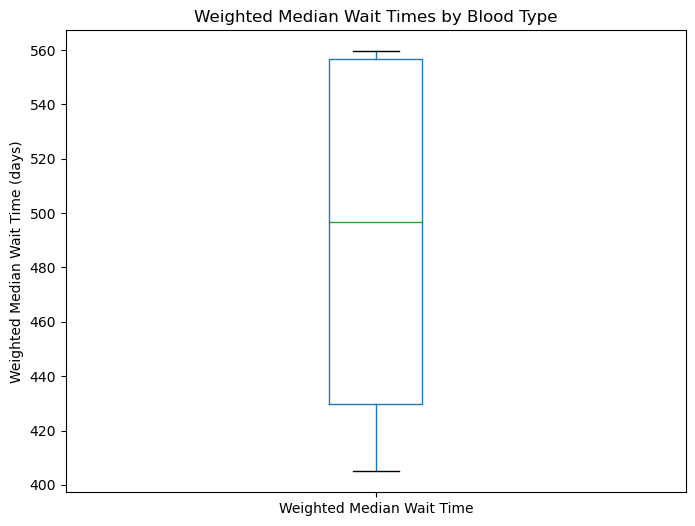

In [16]:
#Weighted Median Wait Times for each blood type in Oklahoma
weighted_median_wait_times = {
    'Blood Type O': 555.84,
    'Blood Type A': 437.97,
    'Blood Type B': 559.55,
    'Blood Type AB': 405.00
}

# Convert the dictionary to a DataFrame
df_wait_times = pd.DataFrame(list(weighted_median_wait_times.items()), columns=['Blood Type', 'Weighted Median Wait Time'])

# Create a boxplot
plt.figure(figsize=(8, 6))
boxplot = df_wait_times.boxplot(column='Weighted Median Wait Time', grid=False)
plt.title('Weighted Median Wait Times by Blood Type')
plt.ylabel('Weighted Median Wait Time (days)')
plt.show()

## Wait time by sex in Oklahoma

In [ ]:
# Oklahoma total for each sex

ok_sex_male = ok_totals1.loc[ok_totals1["Sex"] == "Male"]["Total"].values[0]
ok_sex_female = ok_totals1.loc[ok_totals1["Sex"] == "Female"]["Total"].values[0]

print(ok_sex_male)
print(ok_sex_female)

In [ ]:
# OK sex totals dataframe

ok_sex_totals = pd.DataFrame({"Sex":["Female", "Male"], "Candidates":[ok_sex_female, 
                                                                                   ok_sex_male]})
ok_sex_totals

In [ ]:
# Hypothesis testing

# Assuming even distribution of people amongst sexes - mean of 298.5
# Degree of freedom is 2-1 = 1
# p-value = 0.05
# Reset index to sex

ok_sex_totals["Expected"] = 298.5

ok_sex_totals.set_index("Sex")

critical_value = stats.chi2.ppf(q = 0.95, df = 1)
print(critical_value)

In [ ]:
# Null hypothesis is that number of candidates is evenly distributed amongst sexes

stats.chisquare(ok_sex_totals['Candidates'], ok_sex_totals['Expected'])

In [ ]:
# Creating sex vs wait time dataframe

ok_sex_wait = pd.DataFrame(ok_totals1[["Sex","< 30 days", "30 to < 90 days", "90 days to < 6 months", 
                                        "6 months to < 1 year", "1 year to < 2 years","2 years to < 3 years", 
                                        "3 years to < 5 years", "> 5 years"]]).dropna()
ok_sex_wait

In [ ]:
# Plot above on a bar chart
# Set Blood type as the index
ok_sex_data = ok_sex_wait.set_index("Sex")

# Transpose the DataFrame for easier plotting: https://www.w3resource.com/pandas/dataframe/dataframe-transpose.php
ok_sex_data = ok_sex_data.transpose()

# Plot the bar chart
ok_sex_data.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.title("Kidney Transplant Wait Times by Sex in Oklahoma")
plt.xlabel("Wait Time Category")
plt.ylabel("Number of Cases")
plt.legend(title="Sex", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

In [ ]:
# Creating dataframes for each sex with wait times

# Used the following code to identify the number values assigned to each wait time for each sex:
#ok_sex_female_df = ok_sex_wait.loc[ok_sex_wait["Sex"] == "Female"].transpose().reset_index()
#ok_sex_female_df


ok_sex_male_df = pd.DataFrame({"Wait time":["< 30 days", "30 to < 90 days", "90 days to < 6 months", 
                                        "6 months to < 1 year", "1 year to < 2 years","2 years to < 3 years", 
                                        "3 years to < 5 years", "> 5 years"], "Candidates":[23, 31, 43, 78, 100, 65, 40, 16]})
print(ok_sex_male_df)
print("")

ok_sex_female_df = pd.DataFrame({"Wait time":["< 30 days", "30 to < 90 days", "90 days to < 6 months", 
                                        "6 months to < 1 year", "1 year to < 2 years","2 years to < 3 years", 
                                        "3 years to < 5 years", "> 5 years"], "Candidates":[10, 17, 25, 45, 43, 39, 32, 11]})
print(ok_sex_female_df)
print("")

## Wait time by ethnicity in Oklahoma

In [ ]:
# Total for each ethnicity in Oklahoma

# Total of totals = 599 which is more than the 597 total Oklahoma candidates? Was getting errors on H due to ethnicity
#   type not existing for Oklahoma

ok_ethnicity_type_A = ok_totals1.loc[ok_totals1["Ethnicity"] == "White, Non-Hispanic"]["Total"].values[0]
ok_ethnicity_type_B = ok_totals1.loc[ok_totals1["Ethnicity"] == "Black, Non-Hispanic"]["Total"].values[0]
ok_ethnicity_type_C = ok_totals1.loc[ok_totals1["Ethnicity"] == "Hispanic/Latino"]["Total"].values[0]
ok_ethnicity_type_D = ok_totals1.loc[ok_totals1["Ethnicity"] == "Asian, Non-Hispanic"]["Total"].values[0]
ok_ethnicity_type_E = ok_totals1.loc[ok_totals1["Ethnicity"] == "Multiracial, Non-Hispanic"]["Total"].values[0]
ok_ethnicity_type_F = ok_totals1.loc[ok_totals1["Ethnicity"] == "American Indian/Alaska Native, Non-Hispanic"]["Total"].values[0]
ok_ethnicity_type_G = ok_totals1.loc[ok_totals1["Ethnicity"] == "Pacific Islander, Non-Hispanic"]["Total"].values[0]
#ok_ethnicity_type_H = ok_totals1.loc[ok_totals1["Ethnicity"] == "Unknown"]["Total"].values[0]

print(ok_ethnicity_type_A)
print(ok_ethnicity_type_B)
print(ok_ethnicity_type_C)
print(ok_ethnicity_type_D)
print(ok_ethnicity_type_E)
print(ok_ethnicity_type_F)
print(ok_ethnicity_type_G)
#print(ok_ethnicity_type_H)

In [ ]:
# OK ethnicity totals dataframe

ok_ethnicity_totals = pd.DataFrame({"Ethnicity":["White, Non-Hispanic", "Black, Non-Hispanic", "Hispanic/Latino", 
                                                 "Asian, Non-Hispanic", "Multiracial, Non-Hispanic",
                                                "American Indian/Alaska Native, Non-Hispanic", 
                                                 "Pacific Islander, Non-Hispanic"], "Candidates":[ok_ethnicity_type_A, 
                                                                                                  ok_ethnicity_type_B, 
                                                                                                  ok_ethnicity_type_C, 
                                                                                                  ok_ethnicity_type_D, 
                                                                                                  ok_ethnicity_type_E, 
                                                                                                  ok_ethnicity_type_F, 
                                                                                                  ok_ethnicity_type_G]})
ok_ethnicity_totals

In [ ]:
# Issue with the mean because it has so many points after the decimal

#Hypothesis testing

# Assuming even distribution of people amongst ethnicity - mean of 85.285714285714285714285714285714
# Degree of freedom is 7-1 = 6
# p-value = 0.05
# Reset index to ethnicity

ok_ethnicity_totals["Expected"] = 85.285714285714285714285714285714
pd.set_option('display.precision', 30)
ok_ethnicity_totals.set_index("Ethnicity")


#critical_value = stats.chi2.ppf(q = 0.95, df = 6)
#print(critical_value)

In [ ]:
# Null hypothesis is that number of candidates is evenly distributed amongst ethnicities

#stats.chisquare(ok_ethnicity_totals['Candidates'], ok_ethnicity_totals['Expected'])

In [ ]:
# Creating ethnicity vs wait time dataframe

ok_ethnicity_wait = pd.DataFrame(ok_totals1[["Ethnicity","< 30 days", "30 to < 90 days", "90 days to < 6 months", 
                                        "6 months to < 1 year", "1 year to < 2 years","2 years to < 3 years", 
                                        "3 years to < 5 years", "> 5 years"]]).dropna()
ok_ethnicity_wait

In [ ]:
# Plot above on a bar chart

# Set Ethnicity as the index
ethnicity_data_for_plot = ok_ethnicity_wait.set_index("Ethnicity")

# Transpose the DataFrame for easier plotting
ethnicity_data_for_plot = ethnicity_data_for_plot.transpose()

# Plot the bar chart
ethnicity_data_for_plot.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.title("Kidney Transplant Wait Times by Ethnicity in Oklahoma")
plt.xlabel("Wait Time Category")
plt.ylabel("Number of Cases")
plt.legend(title="Ethnicity", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

In [ ]:
# Creating dataframes for each ethnicity with wait times

# Used the following code to identify the number values assigned to each wait time for each ethnicity:
# ok_ethnicity_type_A_df = ok_ethnicity_wait.loc[ok_ethnicity_wait["Ethnicity"] == "White, Non-Hispanic"].transpose().reset_index()
# ok_ethnicity_type_A_df


# White, Non-Hispanic
ok_ethnicity_type_A_df = pd.DataFrame({"Wait time":["< 30 days", "30 to < 90 days", "90 days to < 6 months", 
                                        "6 months to < 1 year", "1 year to < 2 years","2 years to < 3 years", 
                                        "3 years to < 5 years", "> 5 years"], "Candidates":[19, 25, 35, 63, 77, 55, 35, 11]})
print(ok_ethnicity_type_A_df)
print("")


# Black, Non-Hispanic
ok_ethnicity_type_B_df = pd.DataFrame({"Wait time":["< 30 days", "30 to < 90 days", "90 days to < 6 months", 
                                        "6 months to < 1 year", "1 year to < 2 years","2 years to < 3 years", 
                                        "3 years to < 5 years", "> 5 years"], "Candidates":[14, 15, 21, 46, 47, 25, 15, 7]})
print(ok_ethnicity_type_B_df)
print("")


# American Indian/Alaska Native, Non-Hispanic	
ok_ethnicity_type_C_df = pd.DataFrame({"Wait time":["< 30 days", "30 to < 90 days", "90 days to < 6 months", 
                                        "6 months to < 1 year", "1 year to < 2 years","2 years to < 3 years", 
                                        "3 years to < 5 years", "> 5 years"], "Candidates":[5, 6, 6, 15, 11, 13, 8, 3]})
print(ok_ethnicity_type_C_df)
print("")


# Hispanic/Latino
ok_ethnicity_type_D_df = pd.DataFrame({"Wait time":["< 30 days", "30 to < 90 days", "90 days to < 6 months", 
                                        "6 months to < 1 year", "1 year to < 2 years","2 years to < 3 years", 
                                        "3 years to < 5 years", "> 5 years"], "Candidates":[1, 4, 3, 6, 8, 2, 2, 1]})

print(ok_ethnicity_type_D_df)
print("")


# Asian, Non-Hispanic
ok_ethnicity_type_E_df = pd.DataFrame({"Wait time":["< 30 days", "30 to < 90 days", "90 days to < 6 months", 
                                        "6 months to < 1 year", "1 year to < 2 years","2 years to < 3 years", 
                                        "3 years to < 5 years", "> 5 years"], "Candidates":[1, 2, 3, 2, 1, 7, 2, 0]})
print(ok_ethnicity_type_E_df)
print("")


# Multiracial, Non-Hispanic
ok_ethnicity_type_F_df = pd.DataFrame({"Wait time":["< 30 days", "30 to < 90 days", "90 days to < 6 months", 
                                        "6 months to < 1 year", "1 year to < 2 years","2 years to < 3 years", 
                                        "3 years to < 5 years", "> 5 years"], "Candidates":[2, 5, 6, 15, 19, 12, 6, 3]})
print(ok_ethnicity_type_F_df)
print("")


# Pacific Islander, Non-Hispanic
ok_ethnicity_type_G_df = pd.DataFrame({"Wait time":["< 30 days", "30 to < 90 days", "90 days to < 6 months", 
                                        "6 months to < 1 year", "1 year to < 2 years","2 years to < 3 years", 
                                        "3 years to < 5 years", "> 5 years"], "Candidates":[0, 0, 0, 1, 2, 0, 1, 0]})
print(ok_ethnicity_type_G_df)
print("")


# For national data - will include 'Unknown' category of ethnicity - find candidate values first:
# ethnicity_type_H_df = NTL_DF.loc[NTL_DF["Ethnicity"] == "Unknown"].transpose().reset_index()
# ethnicity_type_H_df

# Unknown
# ethnicity_type_H_df = pd.DataFrame({"Wait time":["< 30 days", "30 to < 90 days", "90 days to < 6 months", 
#                                        "6 months to < 1 year", "1 year to < 2 years","2 years to < 3 years", 
#                                        "3 years to < 5 years", "> 5 years"], "Candidates":[?, ?, ?, ?, ?, ?, ?, ?]})

#print(ethnicity_type_H_df)
#print("")

## Wait time by age group in Oklahoma

In [ ]:
# Total for each age group in Oklahoma

# Was getting errors on A and C due to age group not existing for Oklahoma

#ok_age_group_A = ok_totals1.loc[ok_totals1["Age"] == "< 1 Year"]["Total"].values[0]
ok_age_group_B = ok_totals1.loc[ok_totals1["Age"] == "1-5 Years"]["Total"].values[0]
#ok_age_group_C = ok_totals1.loc[ok_totals1["Age"] == "6-10 Years"]["Total"].values[0]
ok_age_group_D = ok_totals1.loc[ok_totals1["Age"] == "11-17 Years"]["Total"].values[0]
ok_age_group_E = ok_totals1.loc[ok_totals1["Age"] == "18-34 Years"]["Total"].values[0]
ok_age_group_F = ok_totals1.loc[ok_totals1["Age"] == "35-49 Years"]["Total"].values[0]
ok_age_group_G = ok_totals1.loc[ok_totals1["Age"] == "50-64 Years"]["Total"].values[0]
ok_age_group_H = ok_totals1.loc[ok_totals1["Age"] == "65 +"]["Total"].values[0]

#print(ok_age_group_A)
print(ok_age_group_B)
#print(ok_age_group_C)
print(ok_age_group_D)
print(ok_age_group_E)
print(ok_age_group_F)
print(ok_age_group_G)
print(ok_age_group_H)

In [ ]:
# OK ethnicity totals dataframe

ok_age_totals = pd.DataFrame({"Age":["1-5 Years", "11-17 Years", "18-34 Years", "35-49 Years", "50-64 Years", "65 +"], 
                              "Candidates":[ok_age_group_B, ok_age_group_D, ok_age_group_E, ok_age_group_F, 
                                            ok_age_group_G, ok_age_group_H]})
ok_age_totals

In [ ]:
# Hypothesis testing

#Assuming even distribution of people amongst age groups - mean of 99.5
# Degree of freedom is 6-1 = 5
# p-value = 0.05
# Reset index to age

ok_age_totals["Expected"] = 99.5

ok_age_totals.set_index("Age")

critical_value = stats.chi2.ppf(q = 0.95, df = 5)
print(critical_value)

In [ ]:
# Null hypothesis is that number of candidates is evenly distributed amongst age groups

stats.chisquare(ok_age_totals['Candidates'], ok_age_totals['Expected'])

In [ ]:
# Creating age vs wait time dataframe

ok_age_wait = pd.DataFrame(ok_totals1[["Age","< 30 days", "30 to < 90 days", "90 days to < 6 months", 
                                        "6 months to < 1 year", "1 year to < 2 years","2 years to < 3 years", 
                                        "3 years to < 5 years", "> 5 years"]]).dropna()
ok_age_wait

In [ ]:
# Plot above on a bar chart
# Set 'Age' as the index
age_data_for_plot = ok_age_wait.set_index("Age")

# Specify the desired order of ages
ordered_ages = ["1-5 Years", "11-17 Years", "18-34 Years", "35-49 Years", "50-64 Years", "65 +"]

# Reorder the rows based on the desired order
age_data_for_plot = age_data_for_plot.loc[ordered_ages]

# Transpose the DataFrame for easier plotting
age_data_for_plot = age_data_for_plot.transpose()

# Plot the bar chart
age_data_for_plot.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.title("Kidney Transplant Wait Times by Age in Oklahoma")
plt.xlabel("Wait Time Category")
plt.ylabel("Number of Cases")
plt.legend(title="Age", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

In [ ]:
# Creating dataframes for each age group with wait times

# Used the following code to identify the number values assigned to each wait time for each age group:
# ok_age_type_A_df = ok_age_wait.loc[ok_age_wait["Age"] == "< 1 Year"].transpose().reset_index()
# ok_age_type_A_df


# For national data - will include < 1 Year category of age
# age_type_A_df = NTL_DF.loc[NTL_DF["Age"] == "< 1 Year"].transpose().reset_index()
# age_type_A_df

# < 1 Year
# age_type_A_df = pd.DataFrame({"Wait time":["< 30 days", "30 to < 90 days", "90 days to < 6 months", 
#                                        "6 months to < 1 year", "1 year to < 2 years","2 years to < 3 years", 
#                                        "3 years to < 5 years", "> 5 years"], "Candidates":[?, ?, ?, ?, ?, ?, ?, ?]})

#print(age_type_A_df)
#print("")


# 1-5 Years
ok_age_type_B_df = pd.DataFrame({"Wait time":["< 30 days", "30 to < 90 days", "90 days to < 6 months", 
                                        "6 months to < 1 year", "1 year to < 2 years","2 years to < 3 years", 
                                        "3 years to < 5 years", "> 5 years"], "Candidates":[2, 1, 0, 0, 1, 2, 0, 0]})
print(ok_age_type_B_df)
print("")


# For national data - will include 6-10 Years category of age - to find values first do:
# age_type_C_df = NTL_DF.loc[NTL_DF["Age"] == "6-10 Years"].transpose().reset_index()
# age_type_C_df

# 6-10 Years
#age_type_C_df = pd.DataFrame({"Wait time":["< 30 days", "30 to < 90 days", "90 days to < 6 months", 
#                                        "6 months to < 1 year", "1 year to < 2 years","2 years to < 3 years", 
#                                        "3 years to < 5 years", "> 5 years"], "Candidates":[?, ?, ?, ?, ?, ?, ?, ?]})
#print(age_type_C_df)
#print("")


# 11-17 Years
ok_age_type_D_df = pd.DataFrame({"Wait time":["< 30 days", "30 to < 90 days", "90 days to < 6 months", 
                                        "6 months to < 1 year", "1 year to < 2 years","2 years to < 3 years", 
                                        "3 years to < 5 years", "> 5 years"], "Candidates":[0, 1, 0, 0, 0, 1, 0, 0]})

print(ok_age_type_D_df)
print("")


# 18-34 Years
ok_age_type_E_df = pd.DataFrame({"Wait time":["< 30 days", "30 to < 90 days", "90 days to < 6 months", 
                                        "6 months to < 1 year", "1 year to < 2 years","2 years to < 3 years", 
                                        "3 years to < 5 years", "> 5 years"], "Candidates":[1, 2, 3, 2, 1, 7, 2, 0]})
print(ok_age_type_E_df)
print("")


# 35-49 Years
ok_age_type_F_df = pd.DataFrame({"Wait time":["< 30 days", "30 to < 90 days", "90 days to < 6 months", 
                                        "6 months to < 1 year", "1 year to < 2 years","2 years to < 3 years", 
                                        "3 years to < 5 years", "> 5 years"], "Candidates":[8, 10, 7, 30, 29, 22, 15, 10]})
print(ok_age_type_F_df)
print("")


# 50-64 Years
ok_age_type_G_df = pd.DataFrame({"Wait time":["< 30 days", "30 to < 90 days", "90 days to < 6 months", 
                                        "6 months to < 1 year", "1 year to < 2 years","2 years to < 3 years", 
                                        "3 years to < 5 years", "> 5 years"], "Candidates":[12, 23, 39, 47, 61, 40, 28, 10]})
print(ok_age_type_G_df)
print("")


# 65 +
ok_age_type_H_df = pd.DataFrame({"Wait time":["< 30 days", "30 to < 90 days", "90 days to < 6 months", 
                                        "6 months to < 1 year", "1 year to < 2 years","2 years to < 3 years", 
                                        "3 years to < 5 years", "> 5 years"], "Candidates":[8, 7, 13, 33, 37, 28, 21, 7]})

print(ok_age_type_H_df)
print("")

# National

In [ ]:
# New dataframe that includes the category data but excludes 'All states' rows so groupby function can be performed by unique
#  values in the 'State' column in order to work with the categories for all states individually

natl_df = kidney_data.loc[kidney_data["State"] != "All states"]
natl_df = natl_df.loc[kidney_data["State"] != "State unassigned"]
natl_df

In [ ]:
# Testing the dataframe for accuracy by counting Oklahoma total to compare to our value found earlier in the analysis.

ok_test = natl_df.loc[natl_df["State"] == "Oklahoma"]
ok_male_totals = ok_test.loc[ok_totals1["Sex"] == "Male"]["Total"].values[0]
ok_female_totals = ok_test.loc[ok_totals1["Sex"] == "Female"]["Total"].values[0]
ok_test = ok_male_totals + ok_female_totals
ok_test

In [ ]:
# Total candidates nationwide

nat_totals = state_totals["Total"].sum()

nat_totals

In [ ]:
nat_blood_type_O = natl_df.loc[natl_df["Blood type"] == "O"]["Total"].sum()
nat_blood_type_A = natl_df.loc[natl_df["Blood type"] == "A"]["Total"].sum()
nat_blood_type_B = natl_df.loc[natl_df["Blood type"] == "B"]["Total"].sum()
nat_blood_type_AB = natl_df.loc[natl_df["Blood type"] == "AB"]["Total"].sum()
total_blood_types = nat_blood_type_O + nat_blood_type_A + nat_blood_type_B + nat_blood_type_AB
print(nat_blood_type_O)
print(nat_blood_type_A)
print(nat_blood_type_B)
print(nat_blood_type_AB)
print(total_blood_types)

In [ ]:
#Print State Totals

state_totals.head()

In [ ]:
#Add columns to the state Totals for Lat and Lng
state_totals ["Lat"] = ""
state_totals["Lon"] = ""
state_totals.head()

In [ ]:
#Set search parameters
params = {
        "apiKey" : geoapify_key,
        "format":"json"
}
base_url = "https://api.geoapify.com/v1/geocode/search"



In [ ]:
# Print a message to follow up the airport search
print("Starting state search")

# Loop through the cities_pd DataFrame and search coordinates for each city
for index, row in state_totals.iterrows():

    # Get the state's name & add ", United States of America" to the string so geoapify finds the correct city
    state = row["State"] + ", United States of America"

    # Add the current city to the parameters
    params["text"] = f"{state}"

    # Make the API request
    response = requests.get(base_url, params=params)
    
    # Convert response to JSON
    response = response.json()

    # Extract latitude and longitude
    state_totals.loc[index, "Lat"] = response["results"][0]["lat"]
    state_totals.loc[index, "Lon"] = response["results"][0]["lon"]
    
    # Log the search results
    print(f"Coordinates for {state} fetched...")

# Display sample data to confirm that the coordinates appear
state_totals.head()

In [ ]:
%%capture --no-display

# Configure the map plot
state_map = state_totals.hvplot.points( "Lon",
                                    "Lat",
                                    geo = True,
                                    color = "State",
                                    tiles = "OSM",
                                    frame_width = 800,
                                    frame_height = 600,
                                    size = "Total",
                                    scale = 0.3,
                                    hover_cols = ["State", "Total"]
                                    )

# Display the map
state_map

#Save the image
#plt.savefig("../Resources/state_map.png")